In [47]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
# Paths to the directories
train_directory = 'data_multi/train'
valid_directory = 'data_multi/valid'
test_directory = 'data_multi/test'

In [49]:
# Read metadata
train_df = pd.read_csv(train_directory + '/_classes.csv').iloc[:17000]
valid_df = pd.read_csv(valid_directory + '/_classes.csv')
test_df = pd.read_csv(test_directory + '/_classes.csv')

In [50]:
train_df.head()

,filename,Acne,Blackhead,Conglobata,Crystanlline,Cystic,Flat_wart,Folliculitis,Keloid,Milium,Papular,Purulent,Scars,Sebo-crystan-conglo,Syringoma,Whitehead
0,acne-face-4-14__ProtectWyJQcm90ZWN0Il0_FocusFi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,papular_acne_-90-_jpg.rf.18880eae1d02a46ce8888...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,levle3_120_jpg.rf.188dacbcbe564f87634096ce8e99...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,levle0_405_jpg.rf.1891a32235eb590c7246295cfe17...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,levle0_372_jpg.rf.18957128e7d2129d81602f535ff7...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Define image size and batch size
SIZE = 200
BATCH_SIZE = 32

# ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
# Flow from directory with dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_directory,
    x_col='filename',
    y_col='class',
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory=valid_directory,
    x_col='filename',
    y_col='class',
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_directory,
    x_col='filename',
    y_col='class',
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


KeyError: 'class'

In [10]:
# Load pre-trained VGG16
base_model = VGG16(input_shape=(SIZE, SIZE, 3), include_top=False, weights="imagenet")

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
x = GlobalMaxPooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(15, activation='softmax')(x)  # Assuming there are 15 classes

model = Model(base_model.input, x)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 198, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889,775 (3.39 MB)

 Trainable params: 889,423 (3.39 MB)

 Non-trainable params: 352 (1.38 KB)

In [12]:
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, save_weights_only=False)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1, mode='max', min_lr=0.00001)
callbacks_list = [checkpoint, reduce_lr]


In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=10,
    verbose=1,
    callbacks=callbacks_list
)

In [14]:
callback = myCallback()

checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, save_weights_only=False)
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    verbose=1,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 351s 634ms/step - accuracy: 0.5480 - loss: 0.4352 - val_accuracy: 0.6644 - val_loss: 0.2068
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 277s 520ms/step - accuracy: 0.7012 - loss: 0.1971 - val_accuracy: 0.6838 - val_loss: 0.1950
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 278s 522ms/step - accuracy: 0.7034 - loss: 0.1782 - val_accuracy: 0.7423 - val_loss: 0.2037
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 281s 528ms/step - accuracy: 0.7216 - loss: 0.1629 - val_accuracy: 0.7102 - val_loss: 0.1789
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 284s 534ms/step - accuracy: 0.7119 - loss: 0.1602 - val_accuracy: 0.7014 - val_loss: 0.1762
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 287s 538ms/step - accuracy: 0.7193 - loss: 0.1536 - val_accuracy: 0.7033 - val_loss: 0.1831
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 298s 559ms/step - accuracy: 0.7244 - loss: 0.1515 - val_accuracy: 0.7278 - val_loss: 0.1851
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 317s 595ms/step - accuracy: 0.7281 -

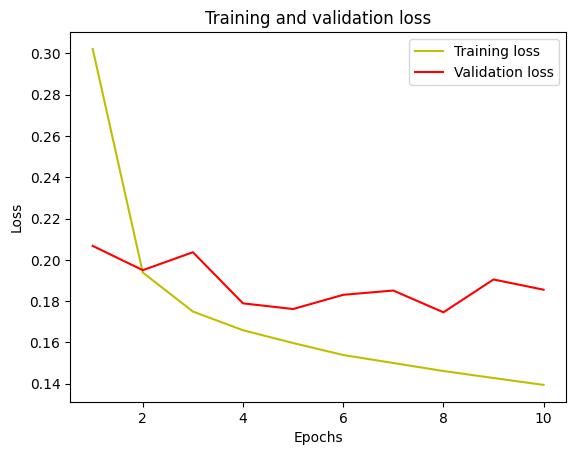

In [15]:
# Plotting the results
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

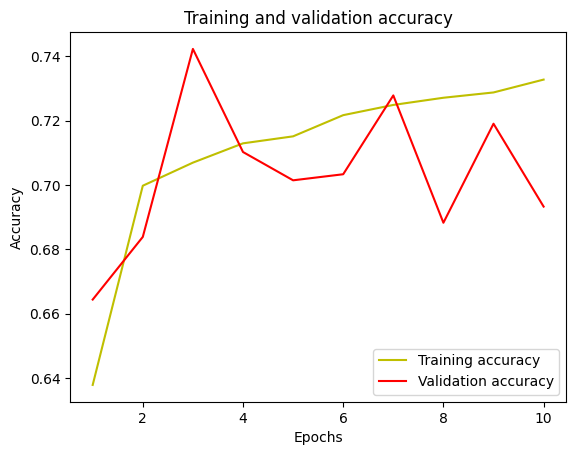

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.save("trained2_model.h5")

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7189 - loss: 0.1707


In [19]:
model = load_model('model_checkpoint.keras')

In [20]:
history = model.fit(
    X_train,
    y_train,
    initial_epoch=10,  
    epochs=20,         
    validation_data=(X_valid, y_valid),
    verbose=1,
    batch_size=32
)

Epoch 11/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 225s 400ms/step - accuracy: 0.7268 - loss: 0.1435 - val_accuracy: 0.7197 - val_loss: 0.1943
Epoch 12/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 195s 367ms/step - accuracy: 0.7284 - loss: 0.1411 - val_accuracy: 0.7033 - val_loss: 0.1739
Epoch 13/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 206s 386ms/step - accuracy: 0.7362 - loss: 0.1344 - val_accuracy: 0.6876 - val_loss: 0.1804
Epoch 14/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 220s 414ms/step - accuracy: 0.7355 - loss: 0.1353 - val_accuracy: 0.7128 - val_loss: 0.1808
Epoch 15/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 220s 414ms/step - accuracy: 0.7387 - loss: 0.1310 - val_accuracy: 0.7247 - val_loss: 0.2061
Epoch 16/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 215s 404ms/step - accuracy: 0.7413 - loss: 0.1283 - val_accuracy: 0.7008 - val_loss: 0.1827
Epoch 17/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 212s 398ms/step - accuracy: 0.7444 - loss: 0.1235 - val_accuracy: 0.6876 - val_loss: 0.1809
Epoch 18/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 214s 402ms/step - accuracy: 

In [21]:
model.save("trained3_model.h5")

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7371 - loss: 0.1624
